In [1]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


Loading required package: ncdf4
Loading required package: R.matlab
Warning message:
"package 'R.matlab' was built under R version 3.4.2"R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen

Loading required package: openxlsx
Loading required package: RColorBrewer
Loading required package: compiler
Loading required package: lattice
Loading required package: geosphere
Warning message:
"package 'geosphere' was built under R version 3.4.2"Loading required package: readxl
Loading required package: data.table
Loading required package: rworldmap
Warning message:
"package 'rworldmap' was built under R version 3.4.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.2"### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')
Loading required package: rworldxtra
Warning message:
"package 'rworldxtra' wa

# Vertical Analysis Module

In [2]:
load('RStates/ship.final.high.rdata')
#load('RStates/MIMS.10sec.1min.rdata')
#load('RStates/EIMS.2min.2min.rdata')
unique(ship.data$Cycle)

[1] "Cycle0"             "SeaSoar1"           "Transect1"         
 [4] "MVP Transect 1"     "Cycle1"             "Cycle1-vertical"   
 [7] "MVP Transect 3"     "Cycle2"             "Cycle2 Vertical"   
[10] "MVP Transect 4"     "Transect2"          "MVP Transect 5"    
[13] "Cycle3"             "Bowtie 1"           "Transect3"         
[16] "Bowtie 2"           "Cycle4"             "Cycle4-Vertical"   
[19] "SeaSoar2"           "BBL"                "Santa Cruz Basin 1"
[22] "TransComp"          "Santa Cruz Basin 2"

In [3]:
winch = read.xlsx('Raw Data/Profiles/winch-depth profiles.xlsx', sheet='All')
winch$DateTime = conv_excel_time(winch$DateTime, tz = 'UTC')
str(winch)

'data.frame':	102 obs. of  5 variables:
 $ Date    : num  42901 42901 42901 42901 42901 ...
 $ Time    : num  0.826 0.867 0.868 0.869 0.871 ...
 $ DateTime: POSIXct, format: "2017-06-15 15:50:00" "2017-06-15 16:48:59" ...
 $ Cycle   : chr  "T3" "T3" "T3" "T3" ...
 $ Depth   : num  0 0 55 52.6 50.5 48.5 46.7 44.8 42.5 40.7 ...


In [4]:
add.profiles = function(ship.data) {
    ship.data$Vertical = 0
    ship.data$Vertical.Depth = 0

    for (i in 1:nrow(ship.data)) {
        dt = as.numeric(difftime(ship.data$DT[i], winch$DateTime, units = 'mins'))
        if (any(dt < 0) & any(dt > 0)) {
            l1 = which.min(-dt[dt<0])
            l2 = which.min(dt[dt > 0])
            ll = which.min(dt^2)
            if (dt[ll] ^ 2 < 100) {
                ship.data$Vertical[i] = winch$Cycle[ll]
            } else {
                ship.data$Vertical[i] = 0
            }
            
            
            m = (winch$Depth[dt > 0][l2] - winch$Depth[dt < 0][l1]) / (-dt[dt < 0][l1] + dt[dt > 0][l2])
            ship.data$Vertical.Depth[i] = m * -dt[dt < 0][l1] + winch$Depth[dt < 0][l1]
        } 
        else {
            ship.data$Vertical.Depth[i] = 0
        }
    }
    ship.data
}

In [5]:
ship.data = add.profiles(ship.data)

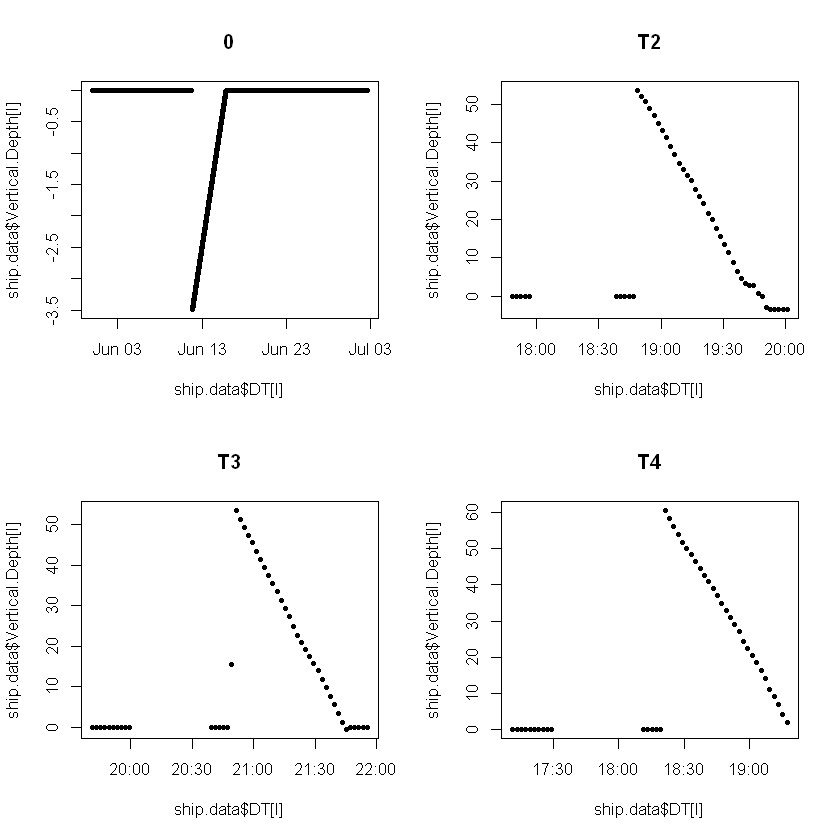

In [6]:
par(mfrow=c(2,2))
for (i in unique(ship.data$Vertical)) {
    l = which(ship.data$Vertical == i)
    plot(ship.data$DT[l], ship.data$Vertical.Depth[l], pch=20, cex=1, main=i)
}


In [7]:
plot.profile = function(name) {
    l = which(ship.data$Vertical == name)
    
    plot(ship.data$MIMS.O2.Ar[l], ship.data$Vertical.Depth[l], pch=20, main=name, ylab='Depth',
         xlab='MIMS O2/Ar', ylim=c(60,5), xaxs='i', yaxs='i')
    plot(ship.data$Optode.ch2[l], ship.data$Vertical.Depth[l], pch=20, main=name, ylab='Depth', xlab='MIMS Optode (ch2)', ylim=c(60,0))
}

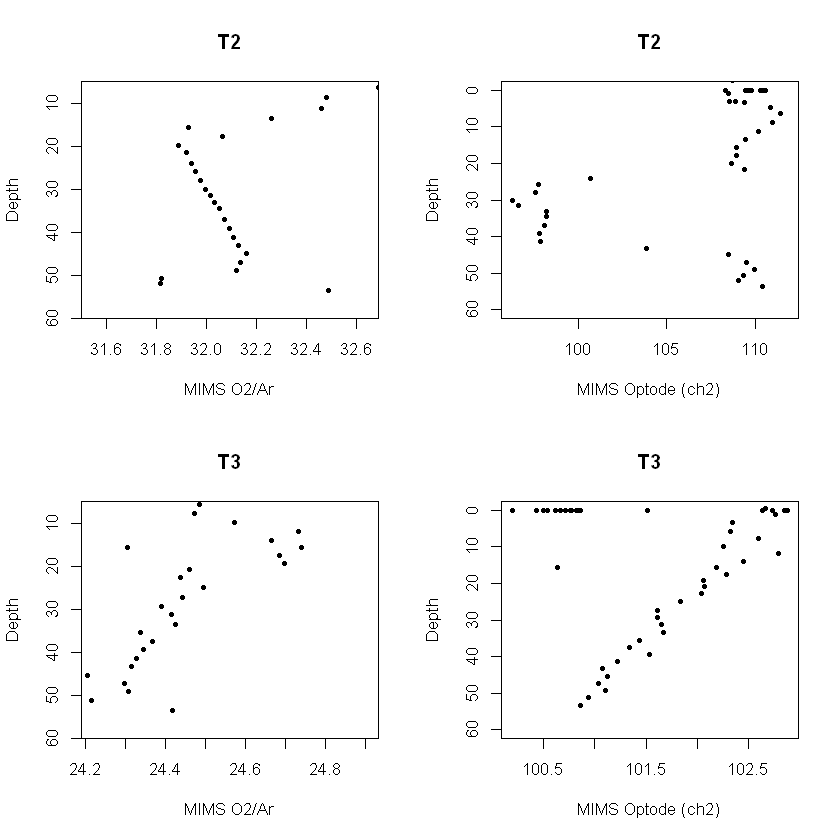

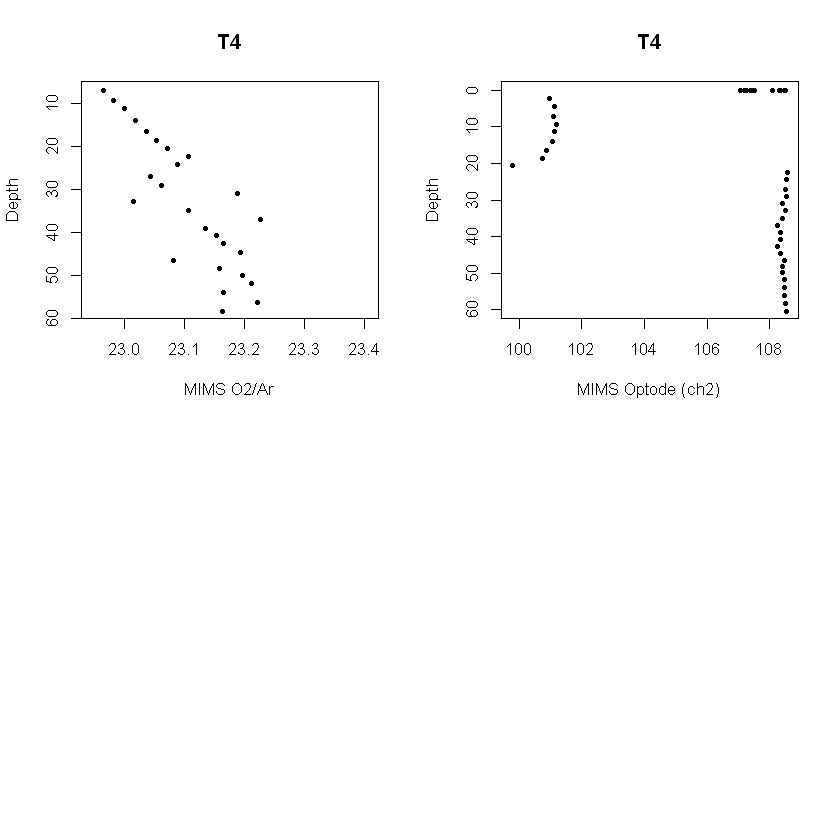

In [8]:
par(mfrow=c(2,2))
plot.profile('T2')
plot.profile('T3')
plot.profile('T4')
